## “Building a Winning Rugby Team based on Wellness and Performance Indicators”
---

**Introduction**: 
Building a winning team is the long-term effort requiring countless hours of practise and preparation. But are
athletes getting the right training? Are they performing their best? In this analysis, we will look at both the
subjective and objective measures provided by Rugby Canada to propose a strong team for their future
tournaments.

### Data 
This analysis is done during the Annual Datafest Competition(2019) at University of Missouri, Columbia. The data provided includes the wellness data of individual atheletes, the GPS live data, and self-repot data of individual performances. 


### Approach
Firstly we created a new feature column ‘outcome’ in the GPS data by matching with the GameID from the
game data file. Then we compare the frequency distributions of winning and losing outcomes for each
features in the GPS data to determine their variations.

We decided to have a closer look at the individual performances at their game days and determines which
players has the potentials to contribute most to the winning team based on their speed and tackling prowess.
We use the violin plot (similar to the box plot) that shows the summary record of the individual performance in
their recent games.

After assessing the individual profiles, we determine which features are essential in improving their health
and recovery during the training. We use Naives Bayes Classifier to predict the the ‘Mornitering Score’ from
the variables of 'Pain', 'Illness', 'Menstruation', 'Nutrition', and 'Nutrition Adjustment'.

### Result
-The Win-Loss comparison of features indicates that the speed and positioning of the team players played a
crucial role in the Winning Team. ( There is a large difference in AccelY and AccelZ between winning and
losing matches)


-The second analysis indicates which players are top performers and who are not. Based on their records,
Player 1, 3, 4 , and 7 are the key players at both sprints and agilities. It also suggests which team players
need more training time.

-The third result shows that most team players have positive outlooks on their fitness. From the Naive Bayes
model, we can predict how much the player is ready. It was indicated by the probability of the monitoring
score given the other variables in the wellness data.

In [0]:
# Importing libraries 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as nr
import math


from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm
from sklearn import feature_selection as fs
from sklearn import metrics
from sklearn.model_selection import cross_validate

import scipy.stats as ss

###Getting Data

In [0]:
gps = pd.read_csv('gps.csv')

### GPS 

In [0]:
gps.columns

Index(['GameID', 'Half', 'PlayerID', 'FrameID', 'Time', 'GameClock', 'Speed',
       'AccelImpulse', 'AccelLoad', 'AccelX', 'AccelY', 'AccelZ', 'Longitude',
       'Latitude'],
      dtype='object')

In [0]:
gps.shape

(4570160, 14)

In [0]:
gps.head()

,GameID,Half,PlayerID,FrameID,Time,GameClock,Speed,AccelImpulse,AccelLoad,AccelX,AccelY,AccelZ,Longitude,Latitude
0,1,1,2,1,00:22:01,00:00:00,0.658334,0.611112,0.005330,0.13250,0.69875,0.56500,55.466666,24.994873
1,1,1,2,2,00:22:01,00:00:00,0.594445,0.638889,0.006568,0.11125,0.92000,0.70625,55.466666,24.994874
2,1,1,2,3,00:22:01,00:00:00,0.363889,2.305557,0.003114,0.01375,0.77000,0.67750,55.466667,24.994874
3,1,1,2,4,00:22:01,00:00:00,0.444445,0.805556,0.002602,0.00625,0.88625,0.59500,55.466667,24.994874
4,1,1,2,5,00:22:01,00:00:00,0.400000,0.444445,0.003813,-0.01750,0.85750,0.57375,55.466668,24.994874


In [0]:
gps.describe()

,GameID,Half,PlayerID,FrameID,Speed,AccelImpulse,AccelLoad,AccelX,AccelY,AccelZ,Longitude,Latitude
count,4.570160e+06,4.570160e+06,4.570160e+06,4.570160e+06,4.570160e+06,4.570160e+06,4.570160e+06,4.570160e+06,4.570160e+06,4.570160e+06,3.054917e+06,4.570160e+06
mean,1.923012e+01,1.498626e+00,8.528556e+00,2.606400e+03,1.077363e+00,9.098921e-01,1.758338e-02,-3.578122e-03,6.970135e-01,5.002148e-01,4.555896e+00,2.410195e+01
std,1.111727e+01,4.999982e-01,4.879095e+00,1.540146e+03,1.428866e+00,1.296938e+00,3.484887e-02,3.066628e-01,6.388154e-01,4.468712e-01,6.795329e+01,3.145520e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-7.678750e+00,-5.922500e+00,-9.733750e+00,-8.914572e+01,-8.757981e+01
25%,1.000000e+01,1.000000e+00,4.000000e+00,1.289000e+03,0.000000e+00,0.000000e+00,1.538392e-03,-1.537500e-01,4.837500e-01,2.900000e-01,-8.159299e+01,2.499372e+01
50%,1.900000e+01,1.000000e+00,8.000000e+00,2.577000e+03,4.916671e-01,2.222224e-01,4.327333e-03,-1.250000e-03,8.450000e-01,5.100000e-01,2.253125e+00,3.777820e+01
75%,2.900000e+01,2.000000e+00,1.300000e+01,3.865000e+03,1.586112e+00,1.416668e+00,1.764683e-02,1.450000e-01,1.021250e+00,7.850000e-01,5.546727e+01,4.844337e+01
max,3.800000e+01,2.000000e+00,2.100000e+01,6.760000e+03,9.016674e+00,5.972227e+00,2.072141e+00,8.588750e+00,7.302500e+00,7.256250e+00,8.855080e+01,4.884404e+01


In [0]:
gps.dtypes

GameID            int64
Half              int64
PlayerID          int64
FrameID           int64
Time             object
GameClock        object
Speed           float64
AccelImpulse    float64
AccelLoad       float64
AccelX          float64
AccelY          float64
AccelZ          float64
Longitude       float64
Latitude        float64
dtype: object

In [0]:
categ = {
    0: 'Win',
    1: 'Loss'
}    
gps['GameID']  = [categ[x] for x in gps3['GameID'] ]

'GameID'

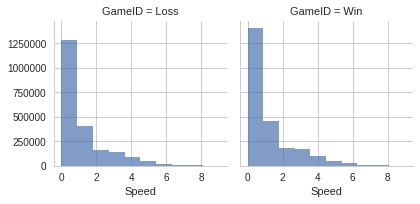

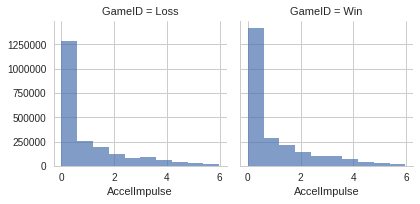

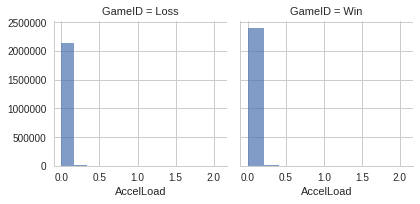

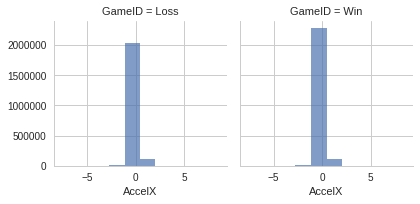

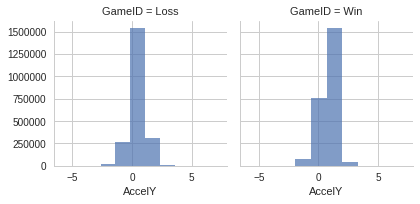

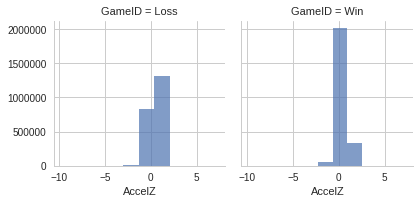

In [0]:
num_cols = [ 'Speed',
       'AccelImpulse', 'AccelLoad', 'AccelX', 'AccelY', 'AccelZ'] 

## Function to plot conditioned histograms
def cond_hists(df, plot_cols, grid_col):
    import matplotlib.pyplot as plt
    import seaborn as sns
    ## Loop over the list of columns
    for col in plot_cols:
        grid1 = sns.FacetGrid(df, col=grid_col)
        grid1.map(plt.hist, col, alpha=.7)
        plt.xlim(xmin=3.73, xmax = 3.74)
    return grid_col



cond_hists(gps3, num_cols, 'GameID')



### Comparing Indiviudal Performances (using PlayerID from GPS data)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_base.py:3604: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')
/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_base.py:3610: MatplotlibDeprecationWarning: 
The `ymax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `top` instead.
  alternative='`top`', obj_type='argument')


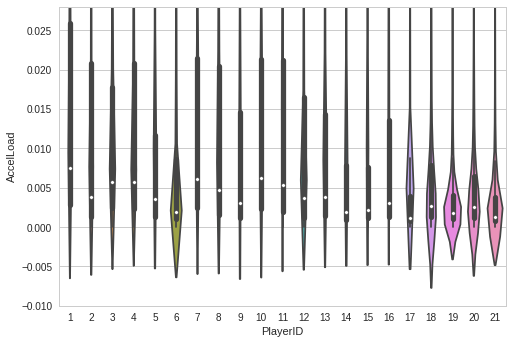

In [0]:
def plot_violin(credit, cols, col_x = 'PlayerID'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.violinplot(col_x, col, data=credit)
        plt.xlabel(col_x) # Set text for the x axis
        plt.ylabel(col)# Set text for y axis
        plt.ylim(ymin=-0.01, ymax = 0.028)

        plt.show()

plot_violin(gps, num_col3)

### Games

In [0]:
games = pd.read_csv('games.csv')

In [0]:
games.shape

(38, 9)

In [0]:
games.head()

,GameID,Date,Tournament,TournamentGame,Team,Opponent,Outcome,TeamPoints,TeamPointsAllowed
0,1,2017-11-30,Dubai,1,Canada,Spain,W,19,0
1,2,2017-11-30,Dubai,2,Canada,Ireland,W,31,0
2,3,2017-11-30,Dubai,3,Canada,Fiji,W,31,14
3,4,2017-12-01,Dubai,4,Canada,France,W,24,19
4,5,2017-12-01,Dubai,5,Canada,Australia,L,7,25


In [0]:
games.dtypes

GameID                int64
Date                 object
Tournament           object
TournamentGame        int64
Team                 object
Opponent             object
Outcome              object
TeamPoints            int64
TeamPointsAllowed     int64
dtype: object

In [0]:
games.isnull().values.any()
games.isnull().sum()

GameID               0
Date                 0
Tournament           0
TournamentGame       0
Team                 0
Opponent             0
Outcome              0
TeamPoints           0
TeamPointsAllowed    0
dtype: int64

In [0]:
games.columns

Index(['GameID', 'Date', 'Tournament', 'TournamentGame', 'Team', 'Opponent',
       'Outcome', 'TeamPoints', 'TeamPointsAllowed'],
      dtype='object')

In [0]:
cat_games = [ 'Tournament', 'TournamentGame', 'Team', 'Opponent',
       'Outcome', 'TeamPoints', 'TeamPointsAllowed']
count_unique(games, cat_games)


For column Tournament
Langford        6
Sydney          6
Dubai           6
Paris           6
Kitakyushu      5
Commonwealth    5
World Cup       4
Name: Tournament, dtype: int64

For column TournamentGame
4    7
3    7
2    7
1    7
5    6
6    4
Name: TournamentGame, dtype: int64

For column Team
Canada    38
Name: Team, dtype: int64

For column Opponent
Russia          6
Ireland         5
Fiji            4
France          4
Australia       4
New Zealand     3
Spain           3
England         3
USA             2
Brazil          1
South Africa    1
Kenya           1
Japan           1
Name: Opponent, dtype: int64

For column Outcome
W    23
L    15
Name: Outcome, dtype: int64

For column TeamPoints
19    7
24    5
7     5
31    3
5     2
14    2
29    2
26    2
21    1
17    1
43    1
22    1
40    1
28    1
33    1
35    1
38    1
0     1
Name: TeamPoints, dtype: int64

For column TeamPointsAllowed
12    8
24    5
10    4
19    3
14    3
0     3
26    2
5     2
34    1
33    1
31   

In [0]:
games.columns

Index(['GameID', 'Date', 'Tournament', 'TournamentGame', 'Team', 'Opponent',
       'Outcome', 'TeamPoints', 'TeamPointsAllowed'],
      dtype='object')

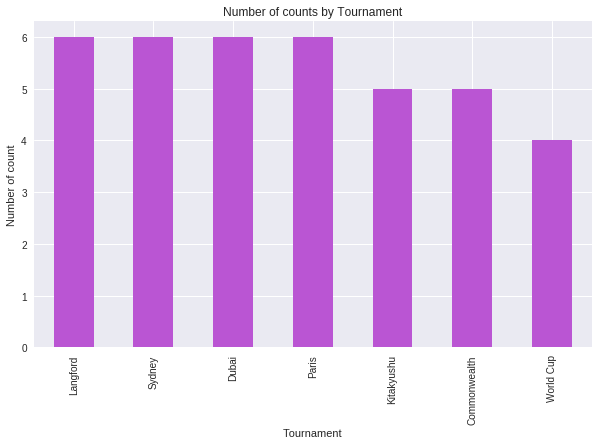

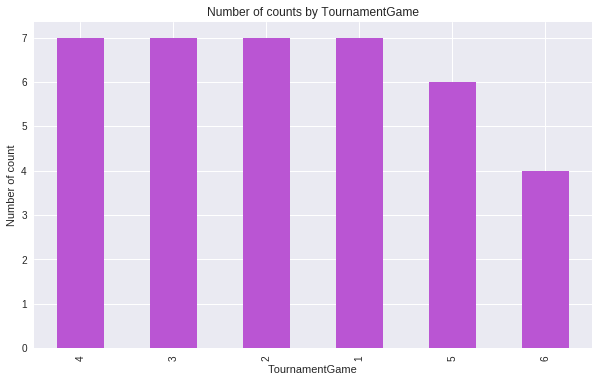

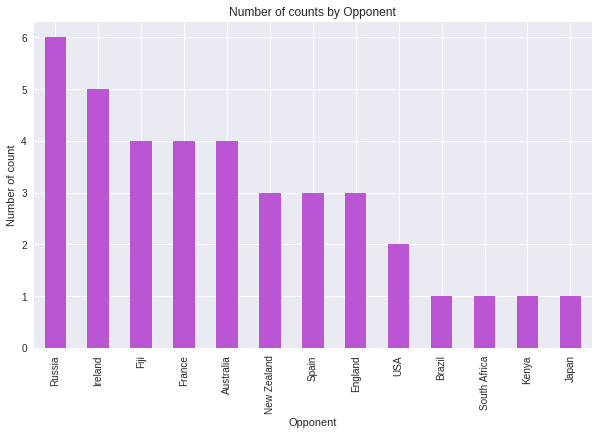

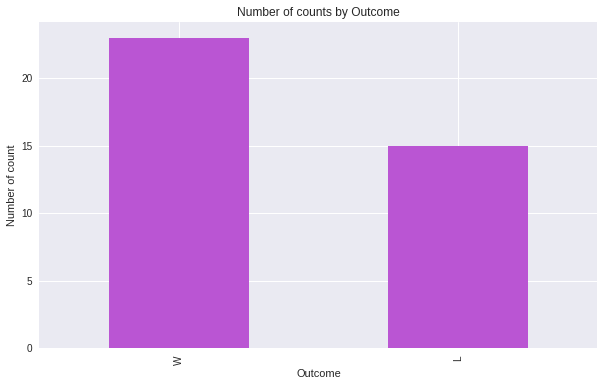

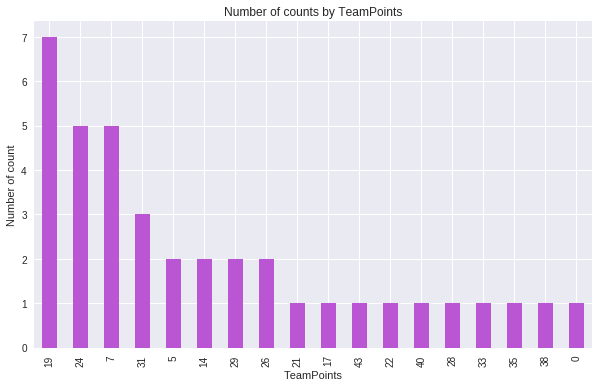

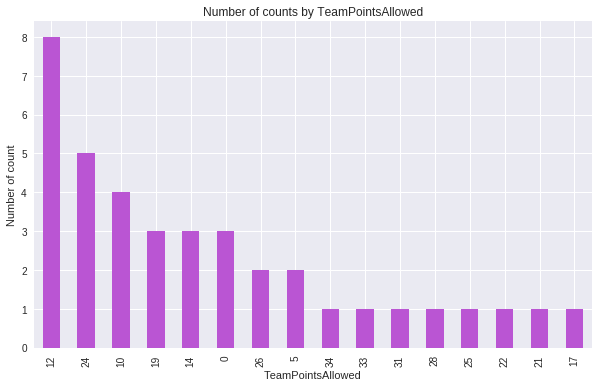

In [0]:
def plot_bars(ccc, cols):
    for col in cols:
        fig = plt.figure(figsize=(10,6)) # define plot area
        ax = fig.gca() # define axis    
#        my_colors = list(islice(cycle(['b', 'r', 'g', 'y']), None, len(ccc)))
#        my_colors = [(x/10.0, x/20.0, 0.75) for x in range(len(ccc))]
        counts = ccc[col].value_counts() # find the counts for each unique category
        counts.plot.bar(ax = ax, color = 'mediumorchid') # Use the plot.bar method on the counts data frame
        
        ax.set_title('Number of counts by ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel('Number of count')# Set text for y axis
        plt.show()

#plot_cols = ['Primary_Type' ]
        
plot_cols = [ 'Tournament', 'TournamentGame',  'Opponent',
       'Outcome', 'TeamPoints', 'TeamPointsAllowed']
plot_bars(games, plot_cols)

#### RPE (Self- Report)

In [0]:
rpe = pd.read_csv('rpe.csv')

In [0]:
rpe.shape

(8860, 14)

In [0]:
rpe.head()

,Date,PlayerID,Training,SessionType,Duration,RPE,SessionLoad,DailyLoad,AcuteLoad,ChronicLoad,AcuteChronicRatio,ObjectiveRating,FocusRating,BestOutOfMyself
0,2018-07-21,13,Yes,Mobility/Recovery,5.0,0.0,0.0,446.0,323.1,303.25,1.07,NaN,NaN,Not at all
1,2018-07-21,13,Yes,Game,29.0,7.0,203.0,NaN,NaN,NaN,NaN,NaN,NaN,Not at all
2,2018-07-21,13,Yes,Game,27.0,9.0,243.0,NaN,NaN,NaN,NaN,NaN,NaN,Not at all
3,2018-07-20,11,Yes,Game,36.0,6.0,216.0,534.0,256.3,344.18,0.74,9.0,10.0,Absolutely
4,2018-07-20,11,Yes,Game,36.0,8.0,288.0,NaN,NaN,NaN,NaN,9.0,10.0,Absolutely


In [0]:
rpe.columns

Index(['Date', 'PlayerID', 'Training', 'SessionType', 'Duration', 'RPE',
       'SessionLoad', 'DailyLoad', 'AcuteLoad', 'ChronicLoad',
       'AcuteChronicRatio', 'ObjectiveRating', 'FocusRating',
       'BestOutOfMyself'],
      dtype='object')

In [0]:
rpe.dtypes

Date                  object
PlayerID               int64
Training              object
SessionType           object
Duration             float64
RPE                  float64
SessionLoad          float64
DailyLoad            float64
AcuteLoad            float64
ChronicLoad          float64
AcuteChronicRatio    float64
ObjectiveRating      float64
FocusRating          float64
BestOutOfMyself       object
dtype: object

In [0]:
rpe.isnull().values.any()
rpe.isnull().sum()

Date                    0
PlayerID                0
Training                0
SessionType          1239
Duration             1239
RPE                  1239
SessionLoad          1239
DailyLoad            5711
AcuteLoad            4511
ChronicLoad          4477
AcuteChronicRatio    4511
ObjectiveRating      4136
FocusRating          4109
BestOutOfMyself      5841
dtype: int64

In [0]:
rpe2.drop(['USG', 'BestOutOf'], axis=1, inplace=True)  ## Dropping the columns with too many Null Values

In [0]:
rpe.shape

(8860, 14)

In [0]:
rpe.columns

Index(['Date', 'PlayerID', 'Training', 'SessionType', 'Duration', 'RPE',
       'SessionLoad', 'DailyLoad', 'AcuteLoad', 'ChronicLoad',
       'AcuteChronicRatio', 'ObjectiveRating', 'FocusRating',
       'BestOutOfMyself'],
      dtype='object')

In [0]:
def plot_bars(ccc, cols):
    for col in cols:
        fig = plt.figure(figsize=(10,6)) # define plot area
        ax = fig.gca() # define axis    
#        my_colors = list(islice(cycle(['b', 'r', 'g', 'y']), None, len(ccc)))
#        my_colors = [(x/10.0, x/20.0, 0.75) for x in range(len(ccc))]
        counts = ccc[col].value_counts() # find the counts for each unique category
        counts.plot.bar(ax = ax, color = 'mediumorchid') # Use the plot.bar method on the counts data frame
        
        ax.set_title('Number of counts by ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel('Number of count')# Set text for y axis
        plt.show()

#plot_cols = ['Primary_Type' ]
        
plot_cols = [ 'Fatigue', 'Soreness', 'Desire', 'Irritability',
       'BedTime', 'WakeTime', 'SleepHours', 'SleepQuality', 'MonitoringScore',
       'Pain', 'Illness', 'Menstruation', 'Nutrition', 'NutritionAdjustment',
       'TrainingReadiness']
plot_bars(rpe, plot_cols)

### Wellness

In [0]:
wellness = pd.read_csv('wellness.csv')

In [0]:
#https://stackoverflow.com/questions/35590474/how-to-create-appropriate-dummy-variables-for-all-categorical-variables-with-mor

In [0]:
wellness.shape

(5011, 19)

In [0]:
wellness.head()

,Date,PlayerID,Fatigue,Soreness,Desire,Irritability,BedTime,WakeTime,SleepHours,SleepQuality,MonitoringScore,Pain,Illness,Menstruation,Nutrition,NutritionAdjustment,USGMeasurement,USG,TrainingReadiness
0,2018-07-21,1,3,3,2,3,23:00:00,07:00:00,8.00,2,13,No,No,Yes,Excellent,Yes,No,NaN,0%
1,2018-07-21,2,4,3,4,4,23:00:00,07:00:00,8.00,4,19,Yes,No,Yes,NaN,NaN,Yes,1.010,0%
2,2018-07-21,3,3,3,5,4,22:30:00,06:30:00,8.00,4,19,No,No,No,NaN,NaN,Yes,1.016,100%
3,2018-07-21,4,2,3,5,4,00:30:00,07:00:00,6.50,1,15,No,No,Yes,Excellent,Yes,Yes,1.025,95%
4,2018-07-21,5,5,3,4,4,23:45:00,07:00:00,7.25,4,20,No,No,No,Okay,Yes,Yes,1.022,100%


In [0]:
wellness.columns

Index(['Date', 'PlayerID', 'Fatigue', 'Soreness', 'Desire', 'Irritability',
       'BedTime', 'WakeTime', 'SleepHours', 'SleepQuality', 'MonitoringScore',
       'Pain', 'Illness', 'Menstruation', 'Nutrition', 'NutritionAdjustment',
       'USGMeasurement', 'USG', 'TrainingReadiness'],
      dtype='object')

In [0]:
wellness.dtypes

Date                    object
PlayerID                 int64
Fatigue                  int64
Soreness                 int64
Desire                   int64
Irritability             int64
BedTime                 object
WakeTime                object
SleepHours             float64
SleepQuality             int64
MonitoringScore          int64
Pain                    object
Illness                 object
Menstruation            object
Nutrition               object
NutritionAdjustment     object
USGMeasurement          object
USG                    float64
TrainingReadiness       object
dtype: object

In [0]:
wellness.isnull().values.any()
wellness.isnull().sum()

Date                      0
PlayerID                  0
Fatigue                   0
Soreness                  0
Desire                    0
Irritability              0
BedTime                   0
WakeTime                  0
SleepHours                0
SleepQuality              0
MonitoringScore           0
Pain                      0
Illness                   0
Menstruation             16
Nutrition               837
NutritionAdjustment     745
USGMeasurement          168
USG                    4382
TrainingReadiness         0
dtype: int64

In [0]:
print(wellness.shape)
print(wellness.Date.unique().shape)

(5011, 19)
(354,)


In [0]:
wellness.tail(3)

,Date,PlayerID,Fatigue,Soreness,Desire,Irritability,BedTime,WakeTime,SleepHours,SleepQuality,MonitoringScore,Pain,Illness,Menstruation,Nutrition,NutritionAdjustment,USGMeasurement,USG,TrainingReadiness
5008,2017-08-01,12,5,4,5,4,22:30:00,06:00:00,7.5,3,21,No,No,Yes,Okay,I Don't Know,No,NaN,90%
5009,2017-08-01,13,4,4,4,4,23:00:00,06:30:00,7.5,4,20,No,No,No,Okay,Yes,No,NaN,100%
5010,2017-08-01,14,4,4,5,5,22:00:00,06:00:00,8.0,6,24,No,No,No,Okay,Yes,No,NaN,100%


In [0]:
#cat_wellness = [ 'Primary_Type', 'Arrest', 'Domestic', 'District', 'Ward']
#count_unique(cc, cat_wellness)

In [0]:
#cc = cc.dropna(axis=0)

#cc.shape

In [0]:
wellness.drop(['USG', 'USGMeasurement'], axis=1, inplace=True)

In [0]:
wellness.shape

(5011, 17)

In [0]:
wellness2 = wellness.dropna(axis = 0)

In [0]:
wellness2.shape

(4142, 17)

In [0]:
wellness2.dtypes

Date                    object
PlayerID                 int64
Fatigue                  int64
Soreness                 int64
Desire                   int64
Irritability             int64
BedTime                 object
WakeTime                object
SleepHours             float64
SleepQuality             int64
MonitoringScore          int64
Pain                    object
Illness                 object
Menstruation            object
Nutrition               object
NutritionAdjustment     object
TrainingReadiness       object
dtype: object

In [0]:
wellness2.columns

Index(['Date', 'PlayerID', 'Fatigue', 'Soreness', 'Desire', 'Irritability',
       'BedTime', 'WakeTime', 'SleepHours', 'SleepQuality', 'MonitoringScore',
       'Pain', 'Illness', 'Menstruation', 'Nutrition', 'NutritionAdjustment',
       'TrainingReadiness'],
      dtype='object')

In [0]:
cat_wellness = [ 'PlayerID', 'Fatigue', 'Soreness', 'Desire', 'Irritability',
       'BedTime', 'WakeTime', 'SleepHours', 'SleepQuality', 'MonitoringScore',
       'Pain', 'Illness', 'Menstruation', 'Nutrition', 'NutritionAdjustment',
       'TrainingReadiness']
count_unique(wellness2, cat_wellness)


For column PlayerID
13    351
11    347
16    344
7     340
10    330
3     325
1     260
4     254
5     234
12    229
9     218
15    193
14    190
6     188
17    156
8     124
2      59
Name: PlayerID, dtype: int64

For column Fatigue
4    1600
3    1466
2     549
5     213
1     178
6     132
7       4
Name: Fatigue, dtype: int64

For column Soreness
3    1590
4    1434
2     650
5     191
1     147
6     119
7      11
Name: Soreness, dtype: int64

For column Desire
4    2533
3     682
5     308
2     241
6     205
1     130
7      43
Name: Desire, dtype: int64

For column Irritability
4    3018
3     554
5     235
6     160
2     104
1      36
7      35
Name: Irritability, dtype: int64

For column BedTime
22:00:00    705
23:00:00    658
22:30:00    594
23:30:00    287
21:30:00    260
22:45:00    236
23:45:00    230
21:00:00    205
22:15:00    194
00:00:00    134
23:15:00    133
21:45:00    120
01:00:00     49
00:30:00     44
21:15:00     43
20:30:00     39
02:00:00     27
20:00:

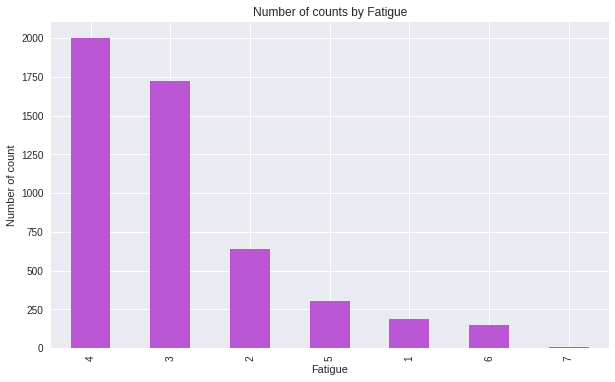

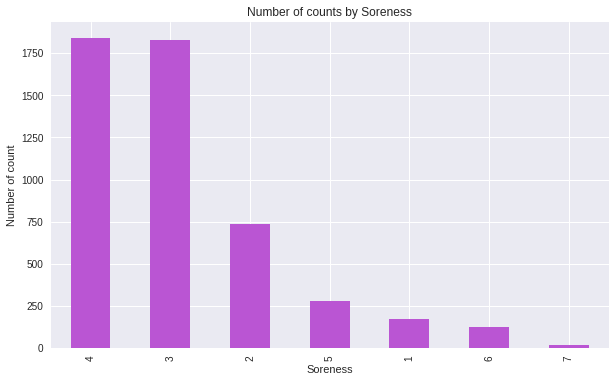

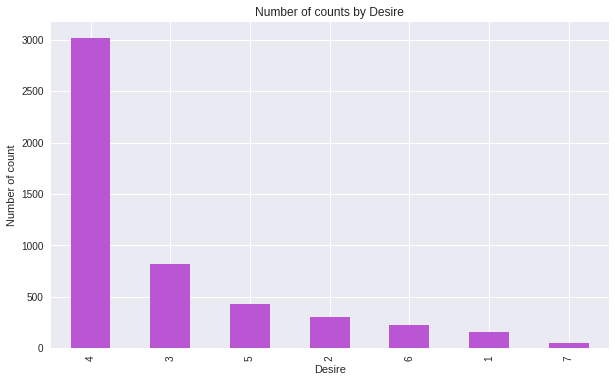

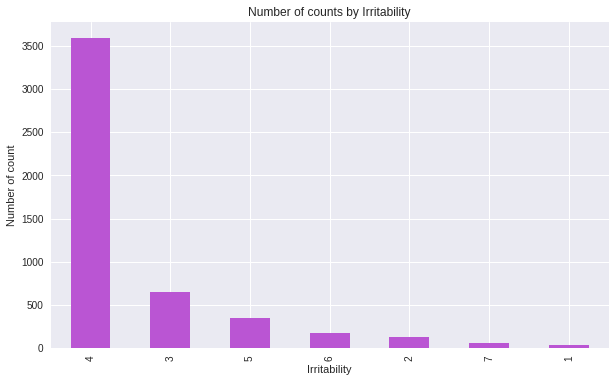

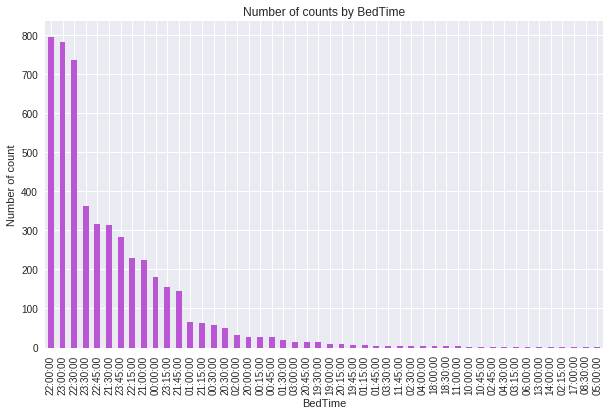

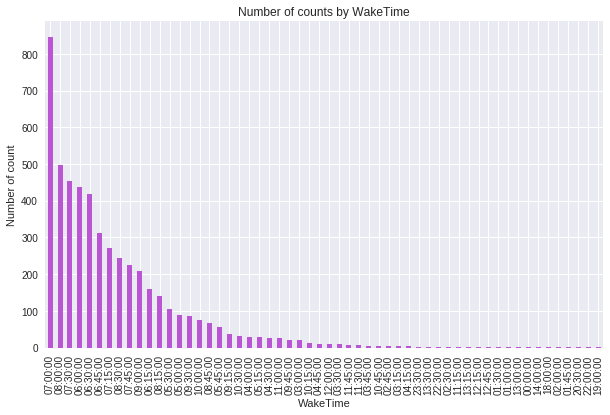

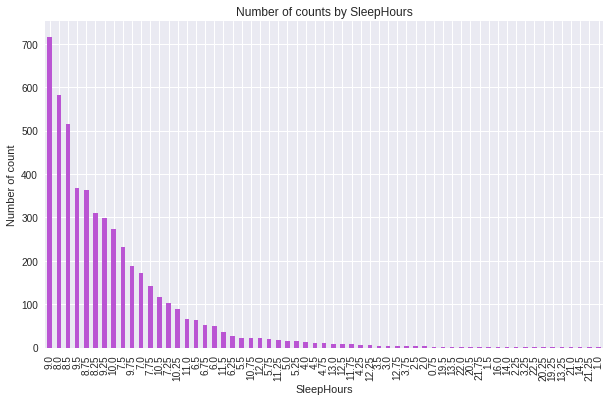

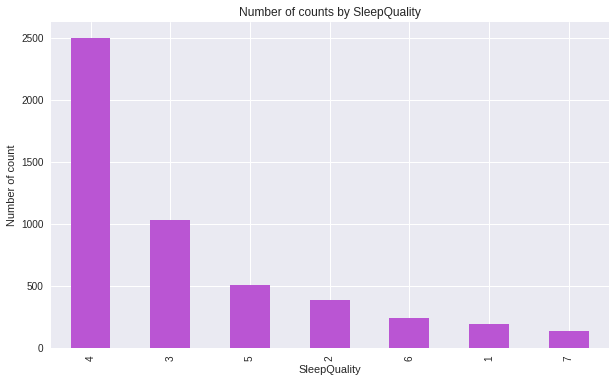

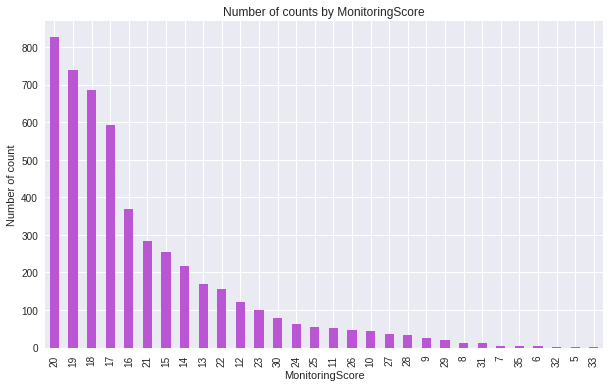

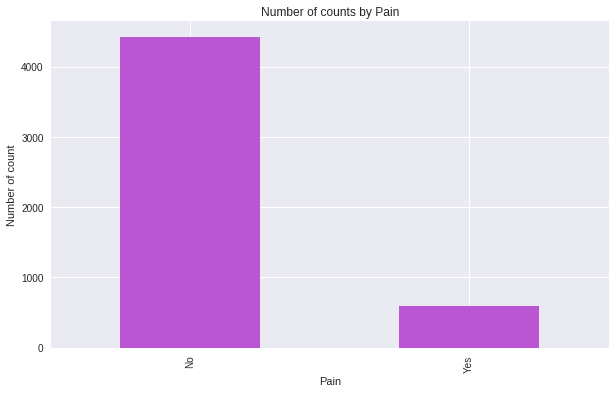

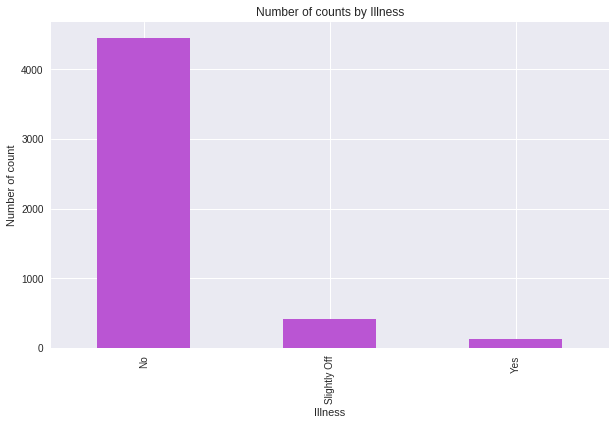

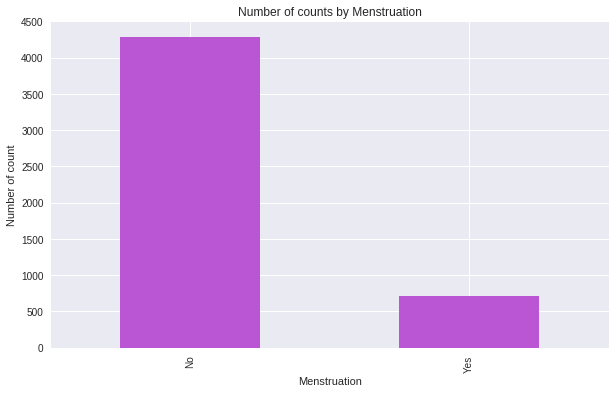

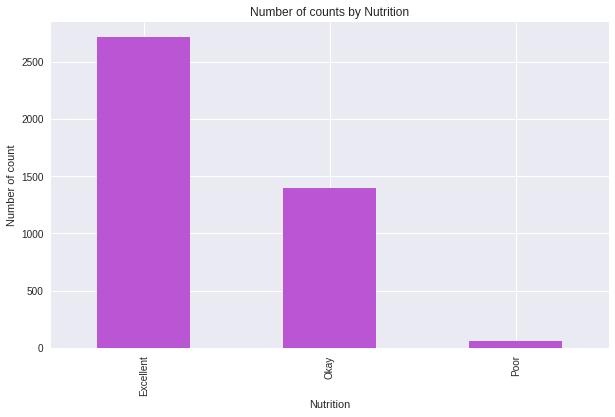

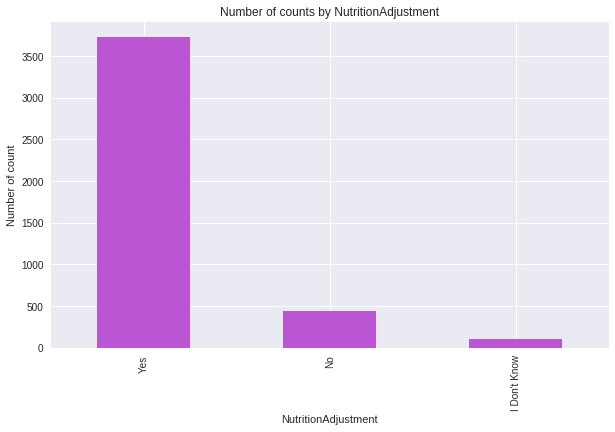

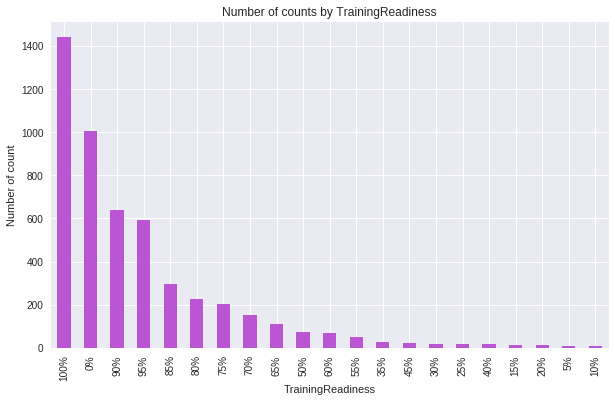

In [0]:
def plot_bars(ccc, cols):
    for col in cols:
        fig = plt.figure(figsize=(10,6)) # define plot area
        ax = fig.gca() # define axis    
#        my_colors = list(islice(cycle(['b', 'r', 'g', 'y']), None, len(ccc)))
#        my_colors = [(x/10.0, x/20.0, 0.75) for x in range(len(ccc))]
        counts = ccc[col].value_counts() # find the counts for each unique category
        counts.plot.bar(ax = ax, color = 'mediumorchid') # Use the plot.bar method on the counts data frame
        
        ax.set_title('Number of counts by ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel('Number of count')# Set text for y axis
        plt.show()

#plot_cols = ['Primary_Type' ]
        
plot_cols = [ 'Fatigue', 'Soreness', 'Desire', 'Irritability',
       'BedTime', 'WakeTime', 'SleepHours', 'SleepQuality', 'MonitoringScore',
       'Pain', 'Illness', 'Menstruation', 'Nutrition', 'NutritionAdjustment',
       'TrainingReadiness']
plot_bars(wellness, plot_cols)

### Joining Wellness and RPE

In [0]:
wellness_rpe = pd.concat([ wellness,rpe], axis=1, join='outer', ignore_index=False)


In [0]:
print (wellness.shape)
print (rpe.shape)

(5011, 17)
(8860, 14)


In [0]:
rpe.dtypes

Date                  object
PlayerID               int64
Training              object
SessionType           object
Duration             float64
RPE                  float64
SessionLoad          float64
DailyLoad            float64
AcuteLoad            float64
ChronicLoad          float64
AcuteChronicRatio    float64
ObjectiveRating      float64
FocusRating          float64
BestOutOfMyself       object
dtype: object

In [0]:
#wellness_rpe.isnull().values.any()
wellness_rpe.isnull().sum()

In [0]:
wellness_rpe.drop(['USG', 'USGMeasurement'], axis=1, inplace=True)

In [0]:
wellness_rpe.shape

(8860, 31)

In [0]:
wellness_rpe.columns

Index(['Date', 'PlayerID', 'Fatigue', 'Soreness', 'Desire', 'Irritability',
       'BedTime', 'WakeTime', 'SleepHours', 'SleepQuality', 'MonitoringScore',
       'Pain', 'Illness', 'Menstruation', 'Nutrition', 'NutritionAdjustment',
       'TrainingReadiness', 'Date', 'PlayerID', 'Training', 'SessionType',
       'Duration', 'RPE', 'SessionLoad', 'DailyLoad', 'AcuteLoad',
       'ChronicLoad', 'AcuteChronicRatio', 'ObjectiveRating', 'FocusRating',
       'BestOutOfMyself'],
      dtype='object')

In [0]:
wellness_rpe.drop(['DailyLoad', 'AcuteLoad', 'ChronicLoad',
       'AcuteChronicRatio', 'ObjectiveRating', 'FocusRating',
       'BestOutOfMyself'], axis=1, inplace=True)

In [0]:
wellness_rpe3 = wellness_rpe.dropna(axis=0)

In [0]:
wellness_rpe3.shape

(3584, 24)

In [0]:
wellness_rpe3.head()

,Date,PlayerID,Fatigue,Soreness,Desire,Irritability,BedTime,WakeTime,SleepHours,SleepQuality,...,Nutrition,NutritionAdjustment,TrainingReadiness,Date,PlayerID,Training,SessionType,Duration,RPE,SessionLoad
0,2018-07-21,1.0,1,3.0,2.0,3.0,23:00:00,07:00:00,8.00,2.0,...,Excellent,Yes,0%,2018-07-21,13,Yes,Mobility/Recovery,5.0,0.0,0.0
3,2018-07-21,4.0,1,3.0,5.0,4.0,00:30:00,07:00:00,6.50,1.0,...,Excellent,Yes,95%,2018-07-20,11,Yes,Game,36.0,6.0,216.0
4,2018-07-21,5.0,0,3.0,4.0,4.0,23:45:00,07:00:00,7.25,4.0,...,Okay,Yes,100%,2018-07-20,11,Yes,Game,36.0,8.0,288.0
5,2018-07-21,7.0,1,2.0,5.0,4.0,22:00:00,07:00:00,9.00,3.0,...,Excellent,Yes,95%,2018-07-20,11,Yes,Mobility/Recovery,15.0,2.0,30.0
6,2018-07-21,10.0,1,2.0,4.0,4.0,22:30:00,05:45:00,7.25,3.0,...,Excellent,Yes,70%,2018-07-20,13,Yes,Game,27.0,6.0,162.0


### Feature Transformation of Wellness Indicators 

In [0]:
wellness_rpe3['Pain'] = wellness_rpe3.Pain.astype("category").cat.codes 


In [0]:
wellness_rpe3['Menstruation'] = wellness_rpe3.Menstruation.astype("category").cat.codes 


In [0]:
categories1 = {
'No':0,
'Slightly Off'        :1, #or Yes
'Yes':1
}

categories2 = {
'Excellent':0,
'Okay'        :1, # 'Okay or Poor
'Poor':1
}

categories3 = {
'Yes' :0,
'No':1,      
"I Don't Know" :1      
}

#wellness_rpe3['Illness']  = [categories1[x] for x in wellness_rpe3['Illness'] ]
#wellness_rpe3['Nutrition']  = [categories2[x] for x in wellness_rpe3['Nutrition'] ]
wellness_rpe3['NutritionAdjustment']  = [categories3[x] for x in wellness_rpe3['NutritionAdjustment'] ]

In [0]:
wellness_rpe3['Date'].value_counts()

In [0]:
cat_wellness3 = [   'MonitoringScore',
       'Pain', 'Illness', 'Menstruation', 'Nutrition', 'NutritionAdjustment'
      ]
count_unique(wellness_rpe3, cat_wellness3)


For column MonitoringScore
1    2476
0    1108
Name: MonitoringScore, dtype: int64

For column Pain
0    3183
1     401
Name: Pain, dtype: int64

For column Illness
0    3204
1     380
Name: Illness, dtype: int64

For column Menstruation
0    3069
1     515
Name: Menstruation, dtype: int64

For column Nutrition
0    2336
1    1248
Name: Nutrition, dtype: int64

For column NutritionAdjustment
0    3121
1     463
Name: NutritionAdjustment, dtype: int64


### Feature Seletction for Wellness Indicator Analysis

In [0]:
labels = np.array(wellness_rpe3.MonitoringScore)
Labels = labels.reshape(labels.shape[0],)

In [0]:
Features = np.array(wellness_rpe3[  ['Pain', 'Illness', 'Menstruation', 'Nutrition', 'NutritionAdjustment']])

In [0]:
## Randomly sample cases to create independent training and test data
nr.seed(1115)
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size = 300)
X_train = Features[indx[0],:]
y_train = np.ravel(Labels[indx[0]])
X_test = Features[indx[1],:]
y_test = np.ravel(Labels[indx[1]])

In [0]:
#Preparing for Cross Validation K-Fold

nr.seed(123)
inside = ms.KFold(n_splits=10, shuffle = True)
nr.seed(321)
outside = ms.KFold(n_splits=10, shuffle = True)

###Model Selection - Naive Bayes

In [0]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB


In [0]:
nr.seed(3456)
## Define the dictionary for the grid search and the model object to search on

param_grid = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10]}
## Define the NB regression model

NB_clf = BernoulliNB() 

## Perform the grid search over the parameters
clf = ms.GridSearchCV(estimator = NB_clf, param_grid = param_grid, 
                      cv = inside, # Use the inside folds
                      scoring = 'roc_auc',
                      return_train_score = True)
clf.fit(Features, Labels)
print(clf.best_estimator_.alpha)

0.0001


In [0]:
#NB_credit = BernoulliNB(alpha = clf.best_estimator_.alpha)
nr.seed(498)
cv_estimate = ms.cross_val_score(clf, Features, Labels, 
                                 cv = outside) # Use the outside folds

print('Mean performance metric = %4.3f' % np.mean(cv_estimate))
print('SDT of the metric       = %4.3f' % np.std(cv_estimate))
print('Outcomes by cv fold')
for i, x in enumerate(cv_estimate):
    print('Fold %2d    %4.3f' % (i+1, x))

Mean performance metric = 0.601
SDT of the metric       = 0.034
Outcomes by cv fold
Fold  1    0.677
Fold  2    0.607
Fold  3    0.579
Fold  4    0.579
Fold  5    0.627
Fold  6    0.548
Fold  7    0.573
Fold  8    0.598
Fold  9    0.623
Fold 10    0.605


In [0]:
def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])

def print_metrics(labels, probs, threshold):
    scores = score_model(probs, threshold)
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score : Below Average   Score : Actual Average')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy        %0.2f' % sklm.accuracy_score(labels, scores))
    print('AUC             %0.2f' % sklm.roc_auc_score(labels, probs[:,1]))
    print('Macro precision %0.2f' % float((float(metrics[0][0]) + float(metrics[0][1]))/2.0))
    print('Macro recall    %0.2f' % float((float(metrics[1][0]) + float(metrics[1][1]))/2.0))
    print(' ')
    print('           Above Average      Below Average')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])

In [0]:
NB_credit_mod = BernoulliNB(alpha = clf.best_estimator_.alpha,
                            class_prior = [0.4,0.6]) 
NB_credit_mod.fit(X_train, y_train)
probabilities = NB_credit_mod.predict_proba(X_test)
print_metrics(y_test, probabilities, 0.5)    

                 Confusion matrix
                 Score : Below Average   Score : Actual Average
Actual positive        32                53
Actual negative        40               175

Accuracy        0.69
AUC             0.67
Macro precision 0.61
Macro recall    0.60
 
           Above Average      Below Average
Num case       85           215
Precision    0.44          0.77
Recall       0.38          0.81
F1           0.41          0.79


In [0]:
def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])
scores = score_model(probabilities, 0.5)

In [0]:
conf1 = sklm.confusion_matrix(y_test, scores)

In [0]:
array = [ [conf1[0,0] , conf1[0,1]],
[conf1[1,0] , conf1[1,1]] ]

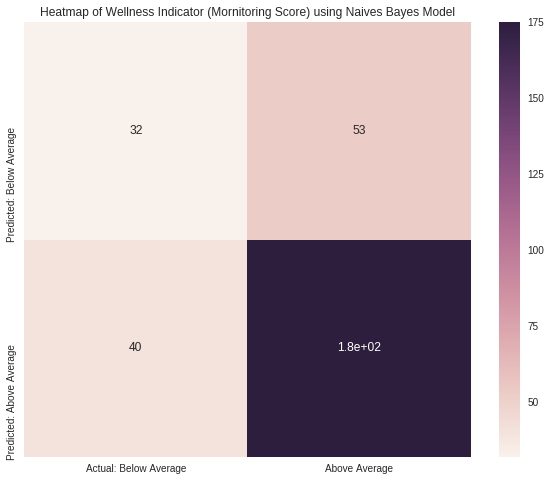

In [0]:
## Ploting the Heatmap for Naive Bayes Result 

df_cm = pd.DataFrame(array, index = [i for i in ['Predicted: Below Average','Predicted: Above Average']],
                  columns = [i for i in ['Actual: Below Average','Above Average']])

fig = plt.figure(figsize=(10,8)) # define plot area
ax = fig.gca()
ax.set_title('Heatmap of Wellness Indicator (Mornitoring Score) using Naives Bayes Model')
sns.heatmap(df_cm, annot=True, ax = ax )

### Conclusion


- Based on our analysis, we suggest that we can give extra training for their defense team (to improve AccelZ
and AccelY scores)
- Team Canada should keep their positivity in their wellbeing but they cannot ignore other important variables
such as skills in determining the success of their team
- Based on the violin plots, we can provide individualized trainings for each team members based on their
speed and tackling skills level.